In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
import get_db
import prepare

In [2]:
df_telco = get_db.get_telco_data()

In [3]:
df = df_telco.drop(['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id',
              'paperless_billing', 'online_security', 'online_backup', 'multiple_lines',
             'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'total_charges'], axis = 1)
df['monthly_charges'] = df['monthly_charges'].astype('int64')
df = df.replace(to_replace = 'No internet service', value = 'No')
df = df.replace(to_replace = 'No phone service', value = 'No')

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
train, test = train_test_split(df, random_state=123, train_size=.8)

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

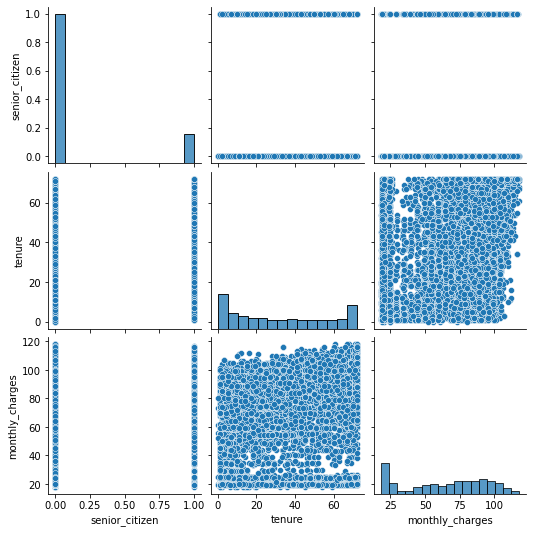

In [5]:
sns.pairplot(train)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [6]:
def months_to_year():
    df['tenure_years'] = ((df['monthly_charges'] * df['tenure'])/12).astype('int64')
    return df

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [8]:
df = months_to_year()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   payment_type           7043 non-null   object
 1   internet_service_type  7043 non-null   object
 2   contract_type          7043 non-null   object
 3   gender                 7043 non-null   object
 4   senior_citizen         7043 non-null   int64 
 5   partner                7043 non-null   object
 6   dependents             7043 non-null   object
 7   tenure                 7043 non-null   int64 
 8   phone_service          7043 non-null   object
 9   monthly_charges        7043 non-null   int64 
 10  churn                  7043 non-null   object
 11  tenure_years           7043 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 660.4+ KB


In [9]:
df.head()

,payment_type,internet_service_type,contract_type,gender,senior_citizen,partner,dependents,tenure,phone_service,monthly_charges,churn,tenure_years
0,Electronic check,DSL,Month-to-month,Female,1,No,No,7,Yes,48,No,28
1,Electronic check,DSL,Month-to-month,Male,1,No,No,1,No,25,Yes,2
2,Electronic check,DSL,Month-to-month,Male,1,No,No,2,Yes,49,Yes,8
3,Electronic check,DSL,One year,Male,0,No,No,64,Yes,81,No,432
4,Electronic check,DSL,Month-to-month,Female,0,Yes,No,6,Yes,50,No,25


In [10]:
def plot_categorical_and_continuous_vars():
    cat_vars = ['payment_type', 'internet_service_type', 'contract_type', 'gender', 'partner',
               'dependents', 'phone_service']
    con_vars = ['tenure', 'monthly_charges', 'tenure_years']
    sns.scatterplot(x=con_vars, y=cat_vars)
    return plot

In [11]:
plot_categorical_and_continuous_vars()

ValueError: arrays must all be same length